<a href="https://colab.research.google.com/github/marcelo31vasco/Anlise_Correlacoes_Clima_Saude_Python_K-MEANS/blob/main/pf_mineracao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DAS CORRELAÇÕES ENTRE DADOS CLIMÁTICOS E SAÚDE GLOBAL (2015-2025)

**Para acessar a base de dados, clique no link abaixo:**

https://drive.google.com/file/d/1rmoGVKAVj1BnsA3jZzkCdvfsN4bBDKHe/view?usp=sharing


In [ ]:
# ============================================================================
# ANÁLISE DAS CORRELAÇÕES ENTRE DADOS CLIMÁTICOS E SAÚDE GLOBAL (2015-2025)
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings

warnings.filterwarnings('ignore')

print("=" * 80)
print("ANÁLISE DAS CORRELAÇÕES ENTRE DADOS CLIMÁTICOS E SAÚDE GLOBAL (2015-2025)")
print("=" * 80)
nomeArquivo = "/content/global_climate_health_impact_tracker_2015_2025.csv"
df = pd.read_csv(nomeArquivo)
df.head()

ANÁLISE DAS CORRELAÇÕES ENTRE DADOS CLIMÁTICOS E SAÚDE GLOBAL (2015-2025)


,record_id,country_code,country_name,region,income_level,date,year,month,week,latitude,...,air_quality_index,respiratory_disease_rate,cardio_mortality_rate,vector_disease_risk_score,waterborne_disease_incidents,heat_related_admissions,healthcare_access_index,gdp_per_capita_usd,mental_health_index,food_security_index
0,1,USA,United States,North America,High,2015-01-04,2015,1,1,37.09,...,82.0,69.4,31.5,6.6,16.2,1.4,77.3,63627.0,71.2,90.2
1,2,USA,United States,North America,High,2015-01-11,2015,1,2,37.09,...,6.0,70.0,26.3,5.2,11.4,0.0,83.6,63627.0,70.6,94.0
2,3,USA,United States,North America,High,2015-01-18,2015,1,3,37.09,...,137.0,66.9,33.4,1.3,19.5,0.0,84.7,63627.0,63.4,100.0
3,4,USA,United States,North America,High,2015-01-25,2015,1,4,37.09,...,-3.0,47.0,35.0,6.0,9.7,9.0,84.3,63627.0,68.1,96.4
4,5,USA,United States,North America,High,2015-02-01,2015,2,5,37.09,...,48.0,61.3,28.3,1.4,22.6,27.3,83.6,63733.0,69.1,100.0


In [ ]:
# ============================================================================
# INFORMAÇÕES BÁSICAS DO DATASET
# ============================================================================

print("\n INFORMAÇÕES BÁSICAS DO DATASET")
print("-" * 80)
print(f"Dimensão da base: {df.shape}")
print(f"\nTipos de dados e valores ausentes:")
print(df.info())

print(f"\nDescrição estatística:")
print(df.describe())

print(f"\nCategorias geográficas:")
print(f"Países únicos: {df['country_name'].nunique()}")
print(df['country_name'].value_counts().head(100))

print(f"\nRegiões:")
print(df['region'].value_counts())


 INFORMAÇÕES BÁSICAS DO DATASET
--------------------------------------------------------------------------------
Dimensão da base: (14100, 30)

Tipos de dados e valores ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14100 entries, 0 to 14099
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     14100 non-null  int64  
 1   country_code                  14100 non-null  object 
 2   country_name                  14100 non-null  object 
 3   region                        14100 non-null  object 
 4   income_level                  14100 non-null  object 
 5   date                          14100 non-null  object 
 6   year                          14100 non-null  int64  
 7   month                         14100 non-null  int64  
 8   week                          14100 non-null  int64  
 9   latitude                      14100 non-null  float64
 10

In [ ]:
# ============================================================================
# CONFIGURAÇÕES GRÁFICAS
# ============================================================================
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


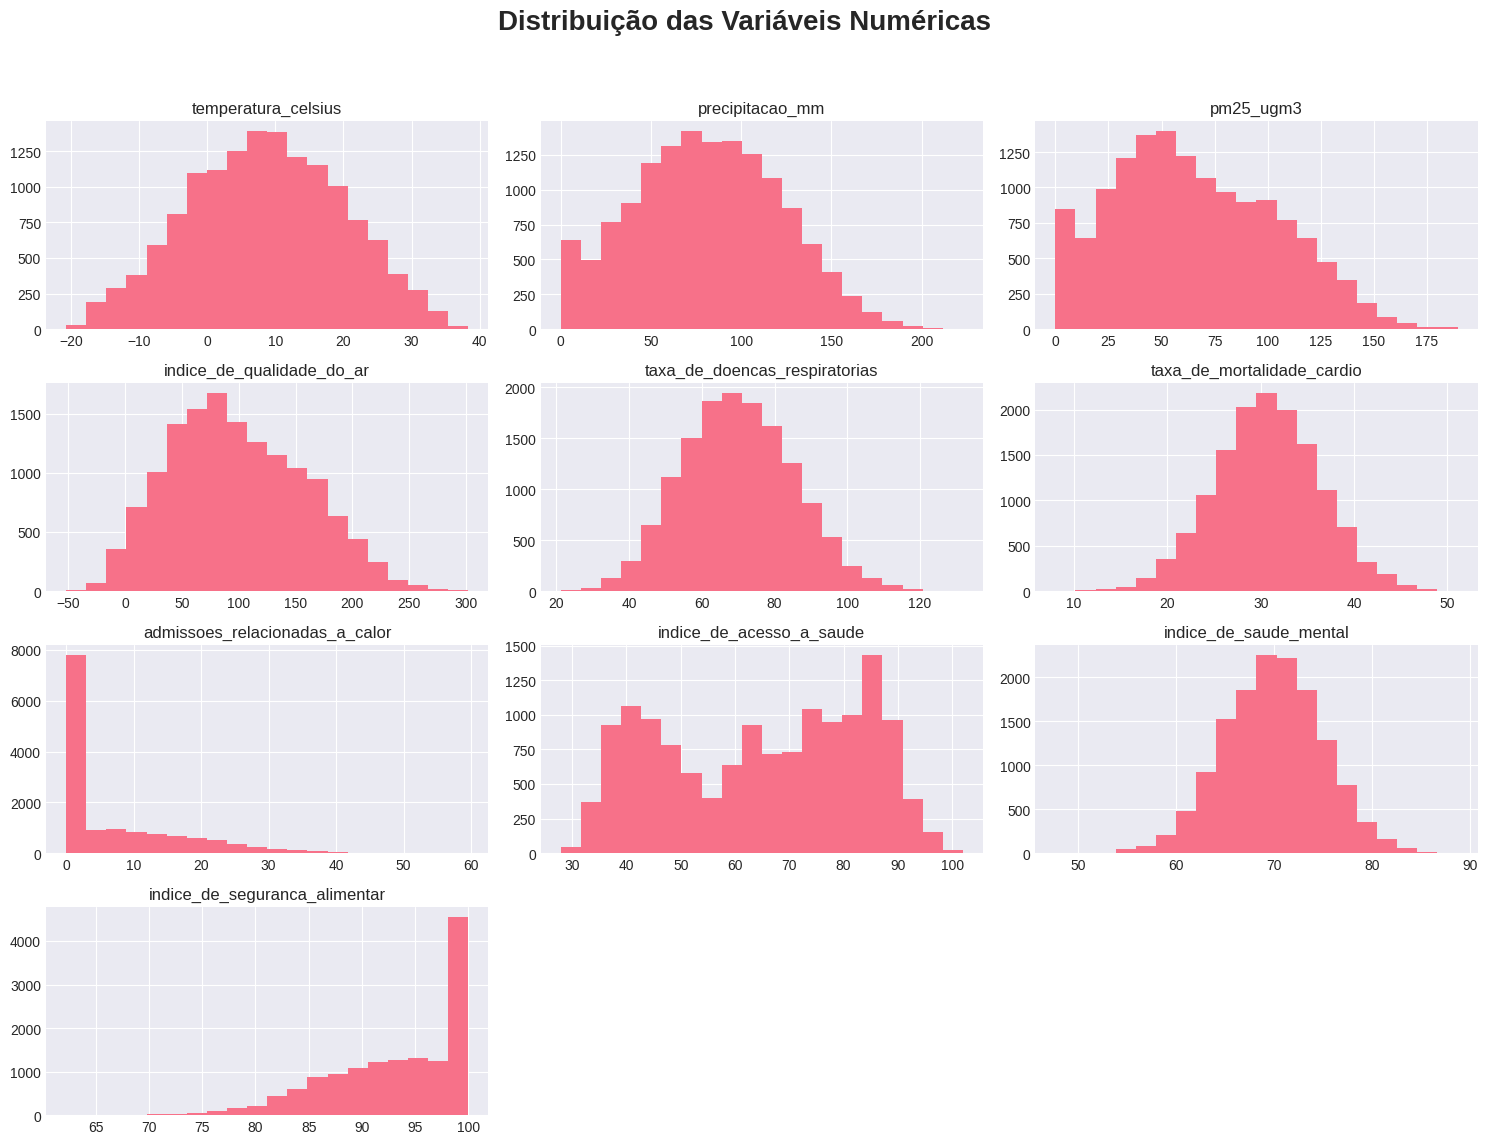

In [ ]:
# ============================================================================
# RENOMEANDO AS COLUNAS E REMOVENDO DUPLICATAS (ETAPA SEMELHANTE A ETAPA DE LIMPEZA)
# ============================================================================
df_clean = df.drop_duplicates().copy()

# Renomeando colunas
rename_dict = {
    'temperature_celsius': 'temperatura_celsius',
    'precipitation_mm': 'precipitacao_mm',
    'pm25_ugm3': 'pm25_ugm3',
    'air_quality_index': 'indice_de_qualidade_do_ar',
    'respiratory_disease_rate': 'taxa_de_doencas_respiratorias',
    'cardio_mortality_rate': 'taxa_de_mortalidade_cardio',
    'heat_related_admissions': 'admissoes_relacionadas_a_calor',
    'healthcare_access_index': 'indice_de_acesso_a_saude',
    'mental_health_index': 'indice_de_saude_mental',
    'food_security_index': 'indice_de_seguranca_alimentar'
}

df_clean.rename(columns=rename_dict, inplace=True)

# Atualizando a lista de colunas numéricas
num_cols = [
    'temperatura_celsius',
    'precipitacao_mm',
    'pm25_ugm3',
    'indice_de_qualidade_do_ar',
    'taxa_de_doencas_respiratorias',
    'taxa_de_mortalidade_cardio',
    'admissoes_relacionadas_a_calor',
    'indice_de_acesso_a_saude',
    'indice_de_saude_mental',
    'indice_de_seguranca_alimentar'
]

# Gerando o histograma
df_clean[num_cols].hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


----------------------------------------------------------------------------------------------------
VISUALIZAÇÃO GERAL DAS ESTATÍSTICAS DE SAÚDE E CINDIÇÕES CLIMÁTICAS
----------------------------------------------------------------------------------------------------


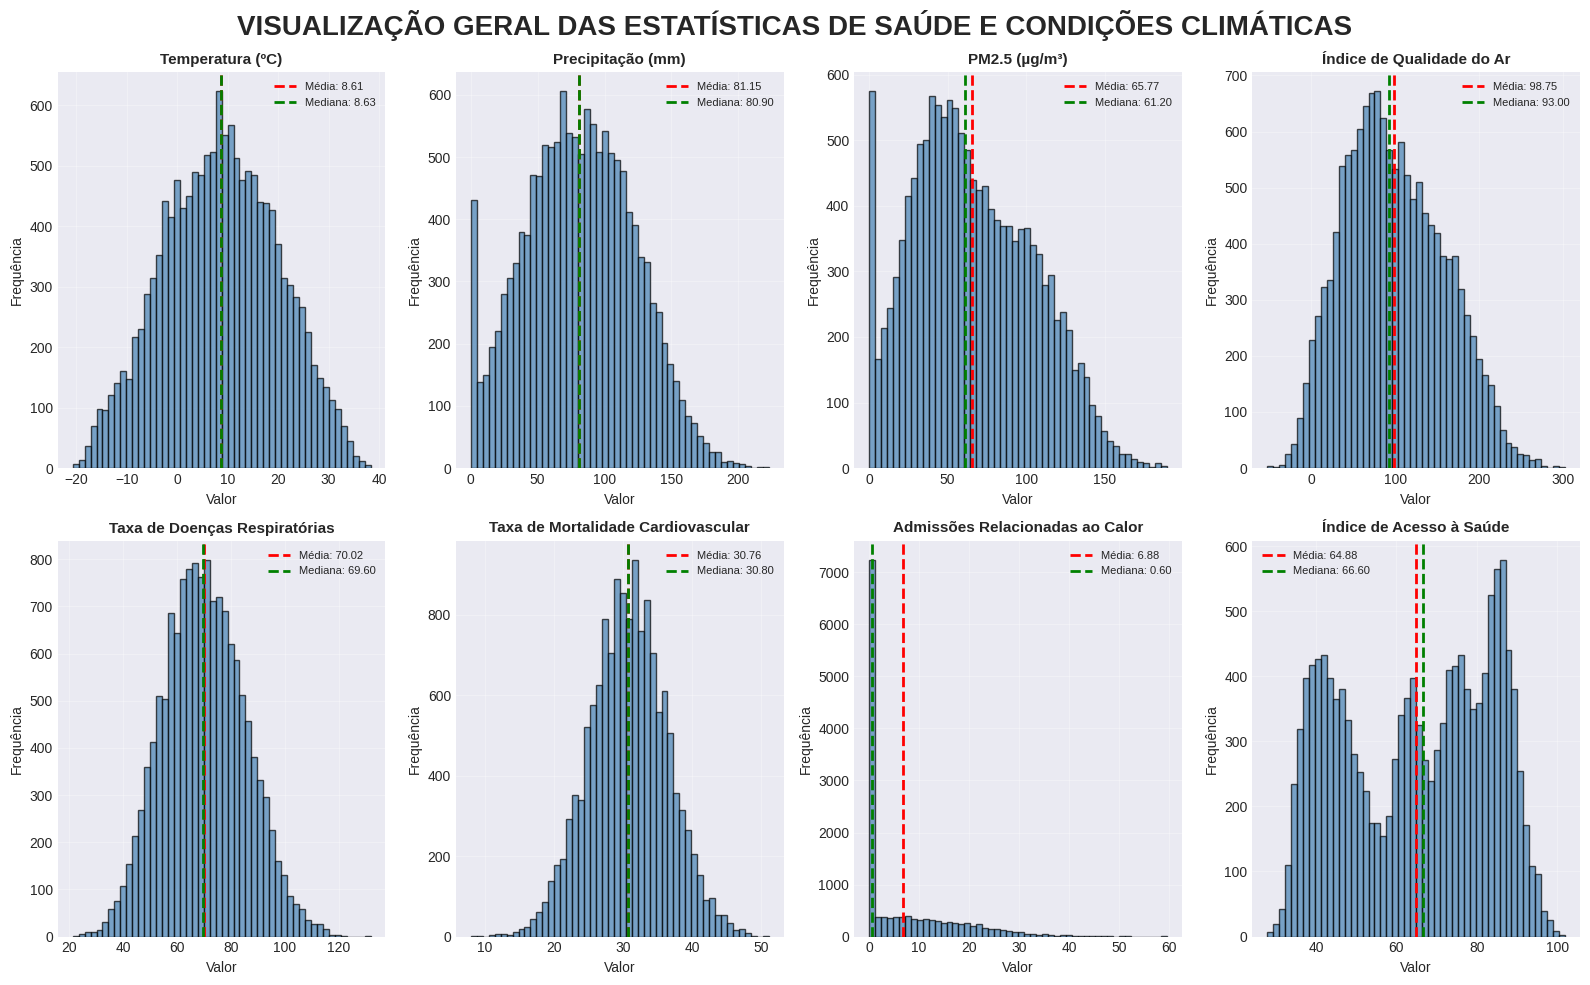

In [ ]:
# ============================================================================
# VISUALIZAÇÃO GERAL DAS ESTATÍSTICAS DE SAÚDE E CINDIÇÕES CLIMÁTICAS
# ============================================================================

print("\n" + "-"*100)
print("VISUALIZAÇÃO GERAL DAS ESTATÍSTICAS DE SAÚDE E CINDIÇÕES CLIMÁTICAS")
print("-"*100)

# Definindo as variáveis para a tabela e gráficos de distribuição
variables_for_table = {
    'temperature_celsius': 'Temperatura (ºC)',
    'precipitation_mm': 'Precipitação (mm)',
    'pm25_ugm3': 'PM2.5 (µg/m³)',
    'air_quality_index': 'Índice de Qualidade do Ar',
    'respiratory_disease_rate': 'Taxa de Doenças Respiratórias',
    'cardio_mortality_rate': 'Taxa de Mortalidade Cardiovascular',
    'heat_related_admissions': 'Admissões Relacionadas ao Calor',
    'healthcare_access_index': 'Índice de Acesso à Saúde'
}

# Calculando as estatísticas para a tabela
stats_data = []
for var_code, var_name in variables_for_table.items():
    stats_data.append({
        'Variável': var_name,
        'Média': df[var_code].mean(),
        'Mediana': df[var_code].median(),
        'Desvio Padrão': df[var_code].std(),
        'Mínimo': df[var_code].min(),
        'Máximo': df[var_code].max()
    })
df_statistics = pd.DataFrame(stats_data)

# Figura com subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for idx, (var_code, var_name) in enumerate(variables_for_table.items()):
    ax = axes[idx]

    # Histograma
    plt.suptitle('VISUALIZAÇÃO GERAL DAS ESTATÍSTICAS DE SAÚDE E CONDIÇÕES CLIMÁTICAS', fontsize=20, fontweight='bold')
    ax.hist(df[var_code], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(df[var_code].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df[var_code].mean():.2f}')
    ax.axvline(df[var_code].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df[var_code].median():.2f}')

    ax.set_title(var_name, fontsize=11, fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('distribuicoes_variaveis.png', dpi=300, bbox_inches='tight')
# Desativei o comando acima (Serve para salvar a imagem gerada no formato png)
plt.show()


----------------------------------------------------------------------------------------------------
CRIANDO VISUALIZAÇÃO DA TABELA
----------------------------------------------------------------------------------------------------


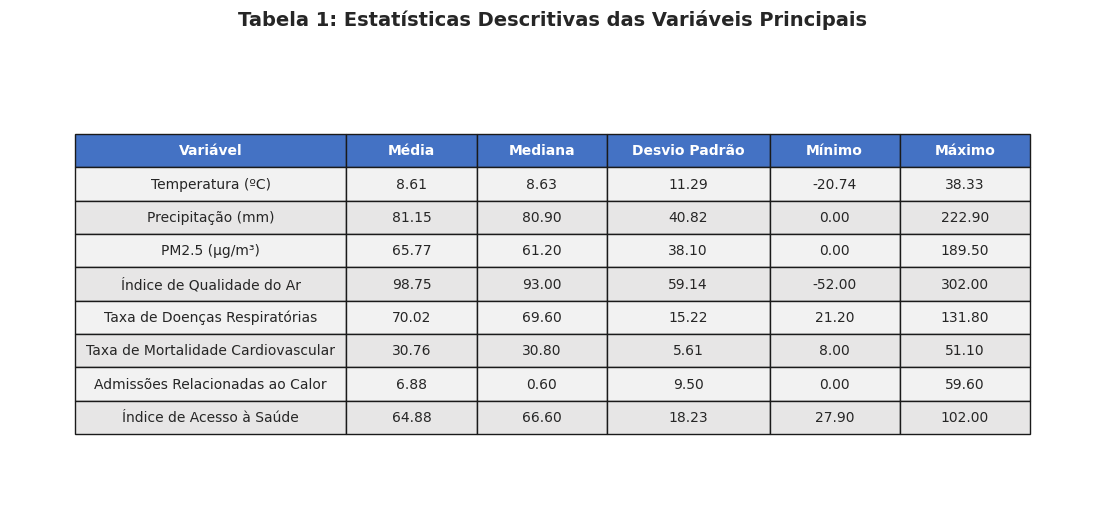

In [ ]:
# ============================================================================
# VISUALIZAÇÃO DA TABELA
# ============================================================================

print("\n" + "-"*100)
print("CRIANDO VISUALIZAÇÃO DA TABELA")
print("-"*100)

# Cria a figura para exibir a tabela
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Prepara os dados para a tabela
table_data_visual = []
for _, row in df_statistics.iterrows():
    table_data_visual.append([
        row['Variável'],
        f"{row['Média']:.2f}",
        f"{row['Mediana']:.2f}",
        f"{row['Desvio Padrão']:.2f}",
        f"{row['Mínimo']:.2f}",
        f"{row['Máximo']:.2f}"
    ])

# Criando a tabela
table = ax.table(cellText=table_data_visual,
                colLabels=['Variável', 'Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo'],
                cellLoc='center',
                loc='center',
                colWidths=[0.25, 0.12, 0.12, 0.15, 0.12, 0.12])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Estilizar cabeçalho
for i in range(6):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Estilizar linhas alternadas
for i in range(1, len(table_data_visual) + 1):
    for j in range(6):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#E7E6E6')
        else:
            table[(i, j)].set_facecolor('#F2F2F2')

plt.title('Tabela 1: Estatísticas Descritivas das Variáveis Principais',
          fontsize=14, fontweight='bold', pad=20)

# plt.savefig('tabela1_visualizacao.png', dpi=300, bbox_inches='tight')
# Desativei o comando acima (Serve para salvar a imagem gerada no formato png)
plt.show()



 Classificação da Qualidade do Ar — PM2.5 
--------------------------------------------------------------------------------


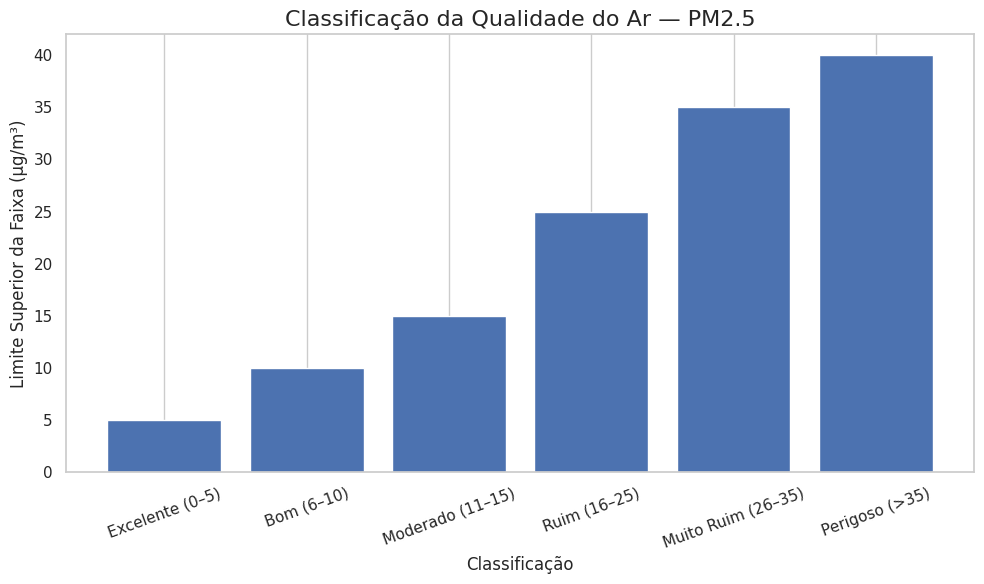

In [ ]:
# Dados das faixas de PM2.5
print("\n\n Classificação da Qualidade do Ar — PM2.5 ")
print("-" * 80)
faixas = ["Excelente (0–5)", "Bom (6–10)", "Moderado (11–15)", "Ruim (16–25)", "Muito Ruim (26–35)", "Perigoso (>35)"]
valores = [5, 10, 15, 25, 35, 40]

plt.figure(figsize=(10, 6))

plt.bar(faixas, valores)
plt.title("Classificação da Qualidade do Ar — PM2.5", fontsize=16)
plt.xlabel("Classificação", fontsize=12)
plt.ylabel("Limite Superior da Faixa (µg/m³)", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

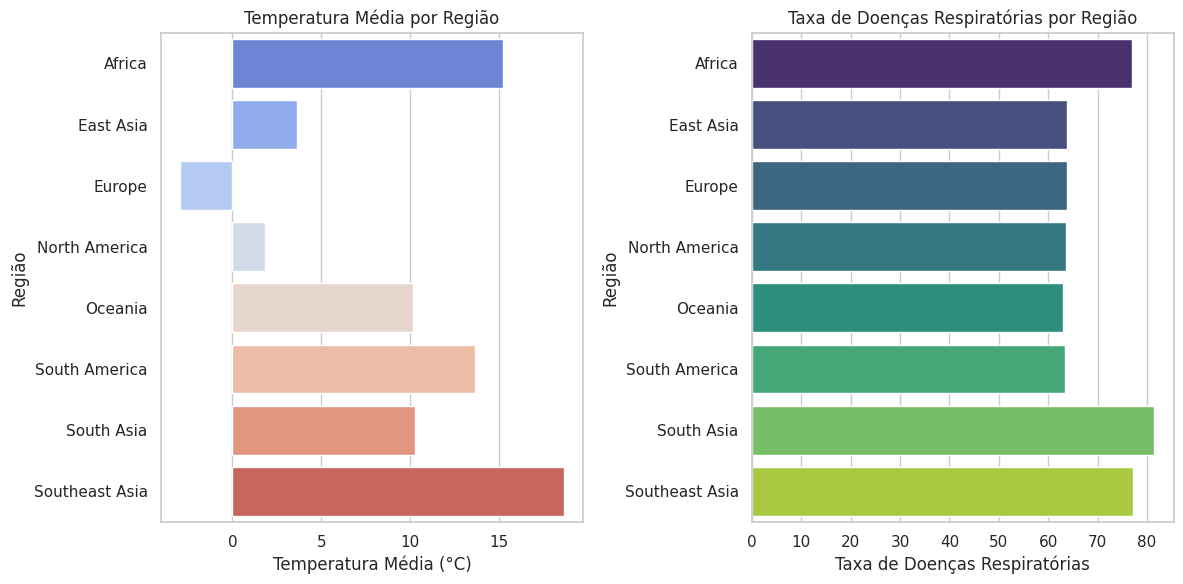

In [ ]:
# Calculando a temperatura média por região
temperatura_media = df.groupby('region')['temperature_celsius'].mean().reset_index()
temperatura_media.columns = ['Região', 'Temperatura Média (°C)']

# Calculando a taxa de doenças respiratórias por região
taxa_doencas_respiratorias = df.groupby('region')['respiratory_disease_rate'].mean().reset_index()
taxa_doencas_respiratorias.columns = ['Região', 'Taxa de Doenças Respiratórias']

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criar gráfico de barras para Temperatura Média
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Temperatura Média (°C)', y='Região', data=temperatura_media, palette='coolwarm')
plt.title('Temperatura Média por Região')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Região')

# Criar gráfico de barras para Taxa de Doenças Respiratórias
plt.subplot(1, 2, 2)
sns.barplot(x='Taxa de Doenças Respiratórias', y='Região', data=taxa_doencas_respiratorias, palette='viridis')
plt.title('Taxa de Doenças Respiratórias por Região')
plt.xlabel('Taxa de Doenças Respiratórias')
plt.ylabel('Região')

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# TRATAMENTO DE DADOS
# ============================================================================
print("\n\nTRATAMENTO E LIMPEZA DE DADOS")
print("-" * 80)

# Remover duplicatas
df_clean = df.drop_duplicates()
print(f"Linhas após remoção de duplicatas: {len(df_clean)}")

# Tratamento de valores nulos
print("\nTratamento de valores nulos:")
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['float64', 'int64']:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"  - {col}: preenchido com mediana")
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
            print(f"  - {col}: preenchido com moda")

# Verifica e corrigir tipos de dados
df_clean['date'] = pd.to_datetime(df_clean['date'])
print(f"\nDataset limpo: {len(df_clean)} registros")



TRATAMENTO E LIMPEZA DE DADOS
--------------------------------------------------------------------------------
Linhas após remoção de duplicatas: 14100

Tratamento de valores nulos:

Dataset limpo: 14100 registros




 1. Distribuição de Temperatura Global (2015 - 2025)
--------------------------------------------------------------------------------


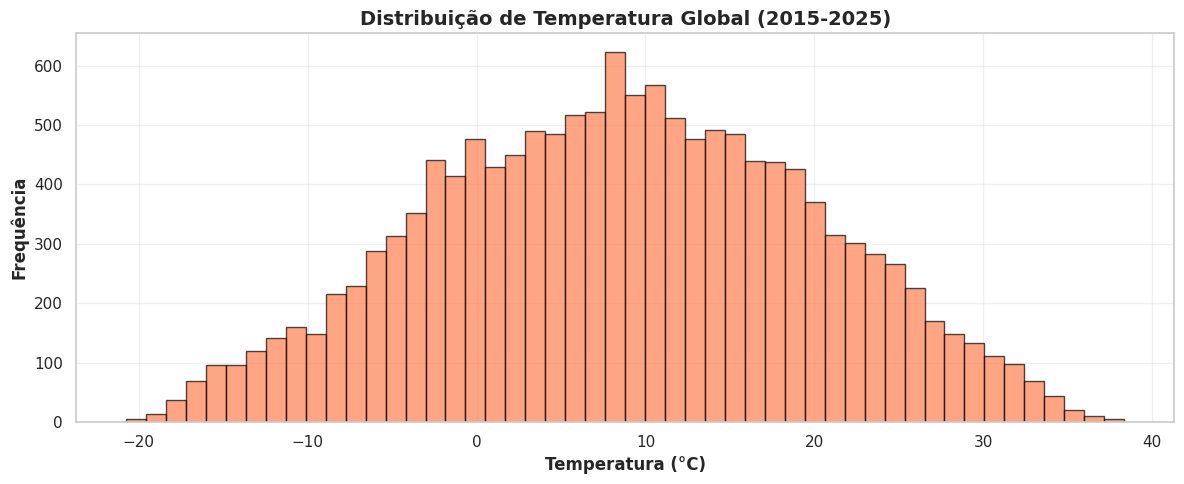

In [ ]:
# ============================================================================
#  VISUALIZAÇÕES EXPLORATÓRIAS
# ============================================================================
print("\n\n 1. Distribuição de Temperatura Global (2015 - 2025)")
print("-" * 80)

# Visualização 1: Distribuição de Temperatura
plt.figure(figsize=(12, 5))
plt.hist(df['temperature_celsius'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Temperatura (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Frequência', fontsize=12, fontweight='bold')
plt.title('Distribuição de Temperatura Global (2015-2025)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



 2. Distribuição de PM2.5 (Qualidade do Ar)
--------------------------------------------------------------------------------


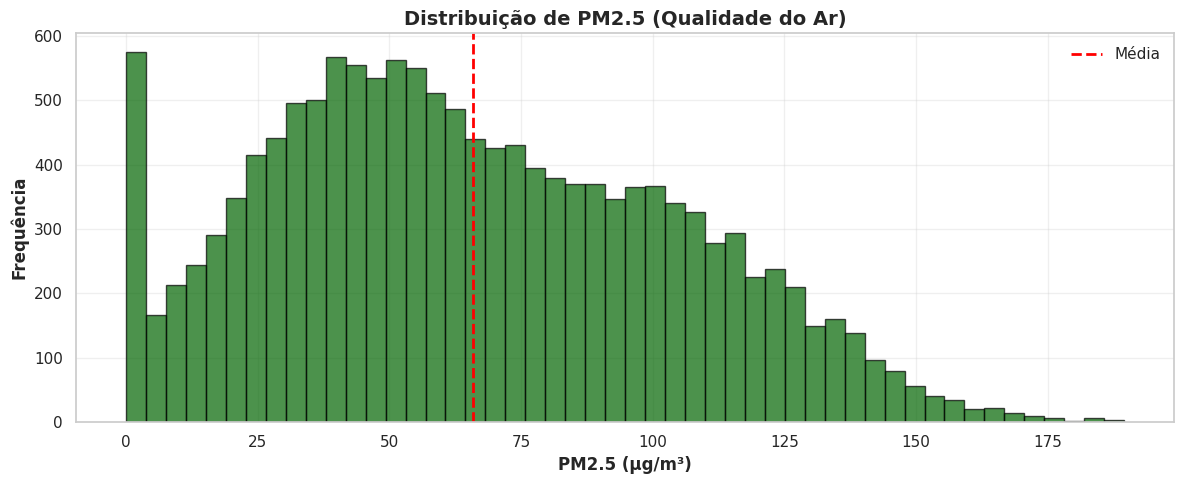

In [ ]:
# Visualização 2: Distribuição de PM2.5
print("\n\n 2. Distribuição de PM2.5 (Qualidade do Ar)")
print("-" * 80)
plt.figure(figsize=(12, 5))
plt.hist(df['pm25_ugm3'], bins=50, color='darkgreen', edgecolor='black', alpha=0.7)
plt.xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
plt.ylabel('Frequência', fontsize=12, fontweight='bold')
plt.title('Distribuição de PM2.5 (Qualidade do Ar)', fontsize=14, fontweight='bold')
plt.axvline(df['pm25_ugm3'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




 3. Relação entre temperatura e doenças respiratórias
--------------------------------------------------------------------------------


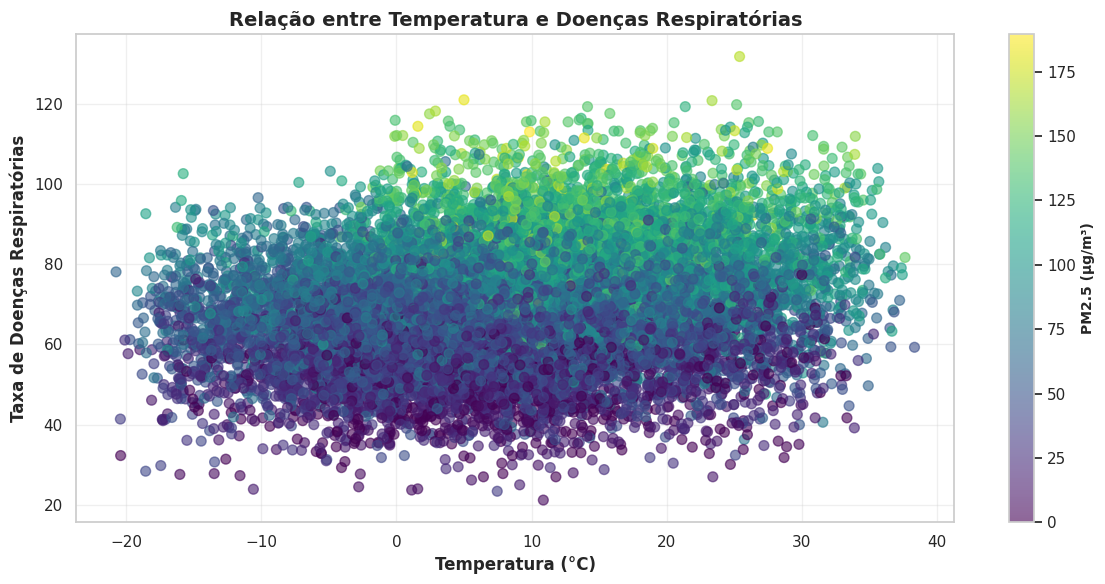

In [ ]:
# Visualização 3: Gráfico de Dispersão - Temperatura vs Doenças Respiratórias
print("\n\n 3. Relação entre temperatura e doenças respiratórias")
print("-" * 80)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['temperature_celsius'], df['respiratory_disease_rate'],
                     c=df['pm25_ugm3'], cmap='viridis', alpha=0.6, s=50)
plt.xlabel('Temperatura (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Taxa de Doenças Respiratórias', fontsize=12, fontweight='bold')
plt.title('Relação entre Temperatura e Doenças Respiratórias', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter)
cbar.set_label('PM2.5 (µg/m³)', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




4.Taxa Média de Doenças Respiratórias por Região )
--------------------------------------------------------------------------------


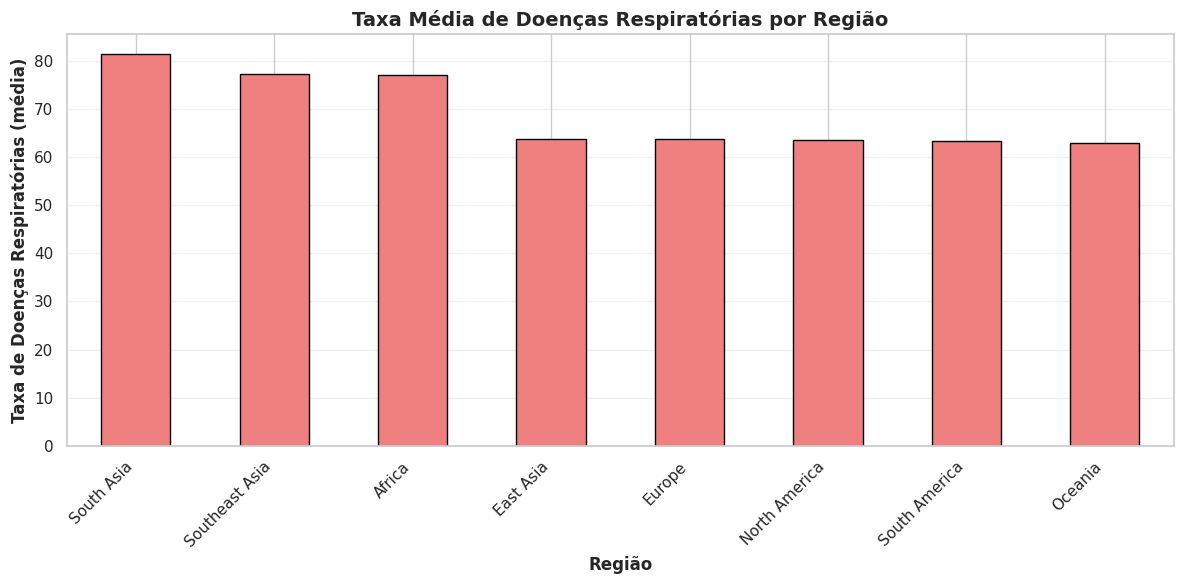

In [ ]:
# Visualização 4: Gráfico de Barras - Doenças Respiratórias por Região
print("\n\n4.Taxa Média de Doenças Respiratórias por Região )")
print("-" * 80)
plt.figure(figsize=(12, 6))
respiratory_by_region = df.groupby('region')['respiratory_disease_rate'].mean().sort_values(ascending=False)
respiratory_by_region.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Região', fontsize=12, fontweight='bold')
plt.ylabel('Taxa de Doenças Respiratórias (média)', fontsize=12, fontweight='bold')
plt.title('Taxa Média de Doenças Respiratórias por Região', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



 5. Evolução Temporal da Temperatura Global (2015-2025) 
--------------------------------------------------------------------------------


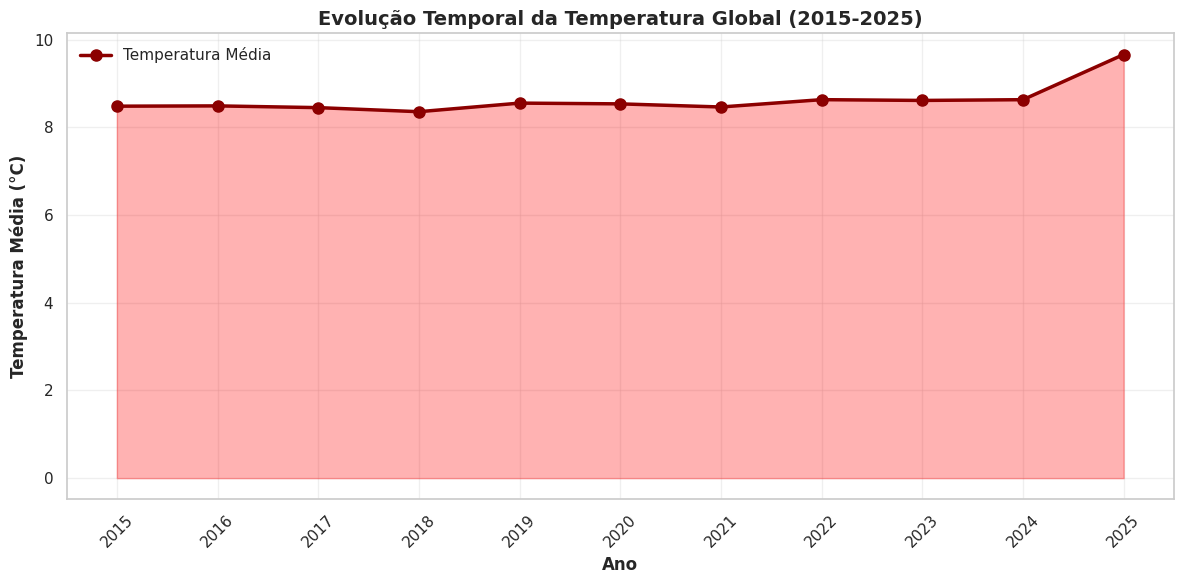

In [ ]:
# Visualização 5: volução Temporal - Temperatura Média
print("\n\n 5. Evolução Temporal da Temperatura Global (2015-2025) ")
print("-" * 80)
fig, ax = plt.subplots(figsize=(12, 6))
temp_by_year = df_clean.groupby('year')['temperature_celsius'].mean()

# Plotar a linha da temperatura média
ax.plot(temp_by_year.index, temp_by_year.values, marker='o', linewidth=2.5,
        markersize=8, color='darkred', label='Temperatura Média')

# Preenchimento abaixo da linha
ax.fill_between(temp_by_year.index, temp_by_year.values, alpha=0.3, color='red')

# Configurar os rótulos e título
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatura Média (°C)', fontsize=12, fontweight='bold')
ax.set_title('Evolução Temporal da Temperatura Global (2015-2025)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.set_xticks(temp_by_year.index)
ax.set_xticklabels(temp_by_year.index, rotation=45)
plt.tight_layout()
plt.show()



 6. Evolução Temporal de Doenças Respiratórias (2015-2025) 
--------------------------------------------------------------------------------


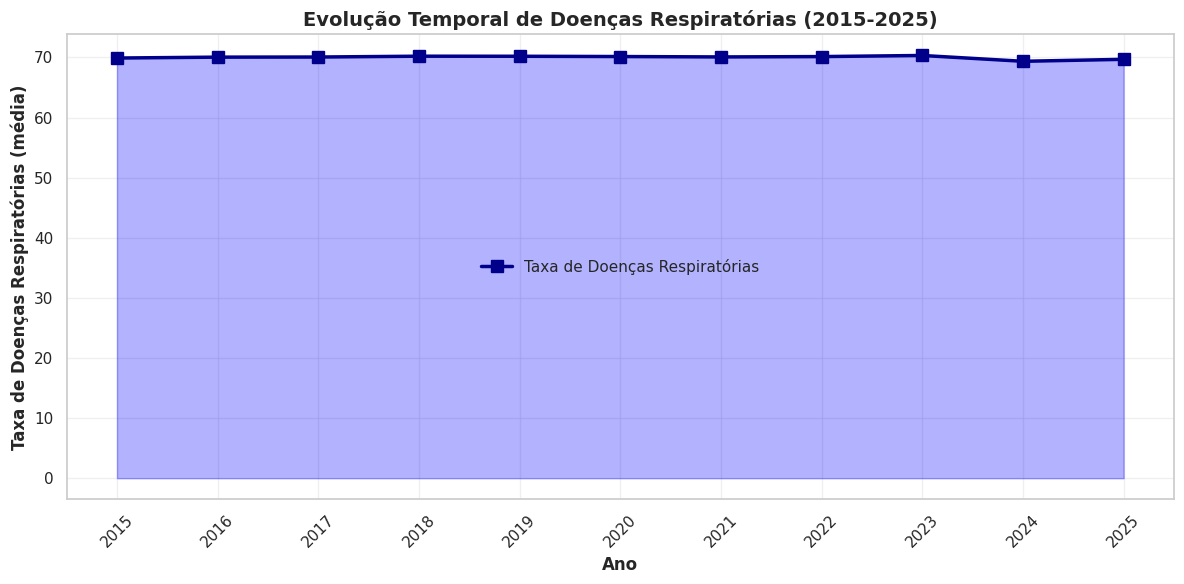

In [ ]:
# Visualização 6: Evolução Temporal de Doenças Respiratórias (2015-2025)
print("\n\n 6. Evolução Temporal de Doenças Respiratórias (2015-2025) ")
print("-" * 80)

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular a taxa média de doenças respiratórias por ano
respiratory_by_year = df_clean.groupby('year')['respiratory_disease_rate'].mean()

# Plotar a linha da taxa de doenças respiratórias
ax.plot(respiratory_by_year.index, respiratory_by_year.values, marker='s', linewidth=2.5,
         markersize=8, color='darkblue', label='Taxa de Doenças Respiratórias')

# Preenchimento abaixo da linha
ax.fill_between(respiratory_by_year.index, respiratory_by_year.values, alpha=0.3, color='blue')

# Configurar os rótulos e título
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Doenças Respiratórias (média)', fontsize=12, fontweight='bold')
ax.set_title('Evolução Temporal de Doenças Respiratórias (2015-2025)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.set_xticks(respiratory_by_year.index)
ax.set_xticklabels(respiratory_by_year.index, rotation=45)
plt.tight_layout()
plt.show()



 7. Índice de Acesso à Saúde por Nível de Renda 
--------------------------------------------------------------------------------


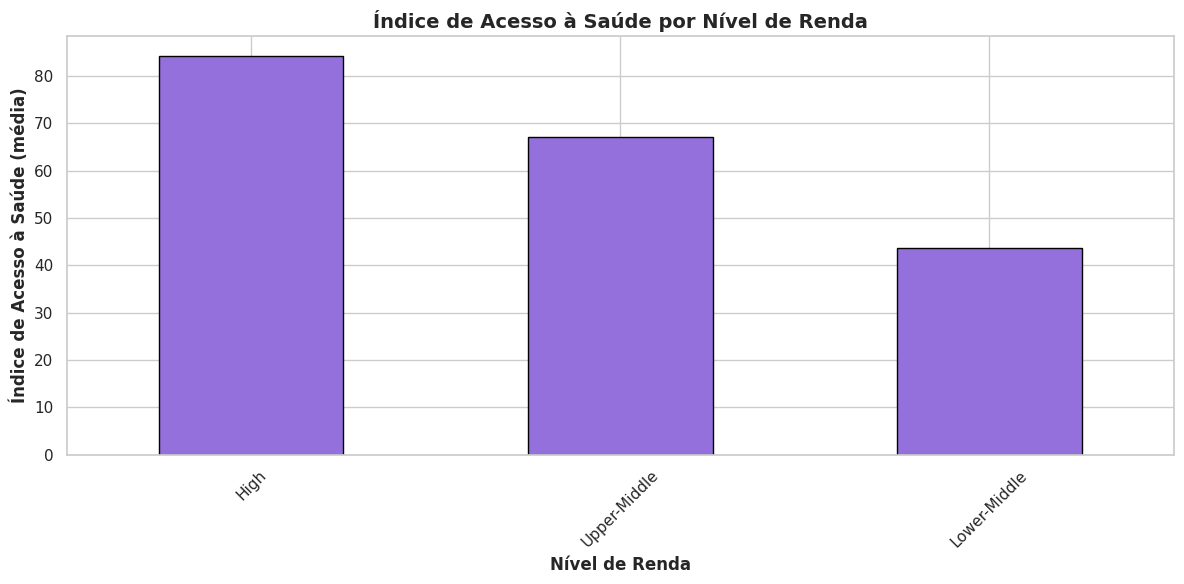

In [ ]:
# Visualização 7:Índice de Acesso à Saúde por Nível de Renda
print("\n\n 7. Índice de Acesso à Saúde por Nível de Renda ")
print("-" * 80)
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular o índice de acesso à saúde por nível de renda
healthcare_by_income = df_clean.groupby('income_level')['healthcare_access_index'].mean().sort_values(ascending=False)
healthcare_by_income.plot(kind='bar', ax=ax, color='mediumpurple', edgecolor='black')
ax.set_xlabel('Nível de Renda', fontsize=12, fontweight='bold')
ax.set_ylabel('Índice de Acesso à Saúde (média)', fontsize=12, fontweight='bold')
ax.set_title('Índice de Acesso à Saúde por Nível de Renda', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# PREPARAÇÃO DE DADOS PARA K-MEANS
# ============================================================================
print("\n\n PREPARAÇÃO DE DADOS PARA K-MEANS")
print("-" * 80)

# Selecionar features para clustering
features = ['temperature_celsius', 'precipitation_mm', 'pm25_ugm3', 'air_quality_index',
            'respiratory_disease_rate', 'cardio_mortality_rate', 'vector_disease_risk_score',
            'heat_related_admissions', 'healthcare_access_index', 'mental_health_index',
            'food_security_index']

X = df[features].copy()
print(f"\nFeatures selecionadas: {len(features)}")
print(f"Dimensões dos dados: {X.shape}")
print(f"\nEstatísticas das features:")
print(X.describe())

# Padronizar os dados (FUNDAMENTAL para K-Means)
print("\nPadronizando os dados...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Dados padronizados com sucesso (média ≈ 0, desvio padrão ≈ 1)")



 PREPARAÇÃO DE DADOS PARA K-MEANS
--------------------------------------------------------------------------------

Features selecionadas: 11
Dimensões dos dados: (14100, 11)

Estatísticas das features:
       temperature_celsius  precipitation_mm     pm25_ugm3  air_quality_index  \
count         14100.000000      14100.000000  14100.000000       14100.000000   
mean              8.607113         81.149440     65.773752          98.750071   
std              11.289938         40.821462     38.102525          59.143284   
min             -20.740000          0.000000      0.000000         -52.000000   
25%               0.257500         51.500000     36.600000          54.000000   
50%               8.630000         80.900000     61.200000          93.000000   
75%              16.850000        110.600000     94.300000         142.000000   
max              38.330000        222.900000    189.500000         302.000000   

       respiratory_disease_rate  cardio_mortality_rate  \
count  



 DETERMINAÇÃO DO NÚMERO ÓTIMO DE CLUSTERS
--------------------------------------------------------------------------------
Testando diferentes valores de K...
  K=2: Inércia=112759.17, Silhueta=0.2620
  K=3: Inércia=98161.69, Silhueta=0.2501
  K=4: Inércia=87788.22, Silhueta=0.1873
  K=5: Inércia=83425.85, Silhueta=0.1504
  K=6: Inércia=79912.58, Silhueta=0.1279
  K=7: Inércia=76091.27, Silhueta=0.1351
  K=8: Inércia=73435.79, Silhueta=0.1281
  K=9: Inércia=71165.88, Silhueta=0.1271
  K=10: Inércia=69286.83, Silhueta=0.1223


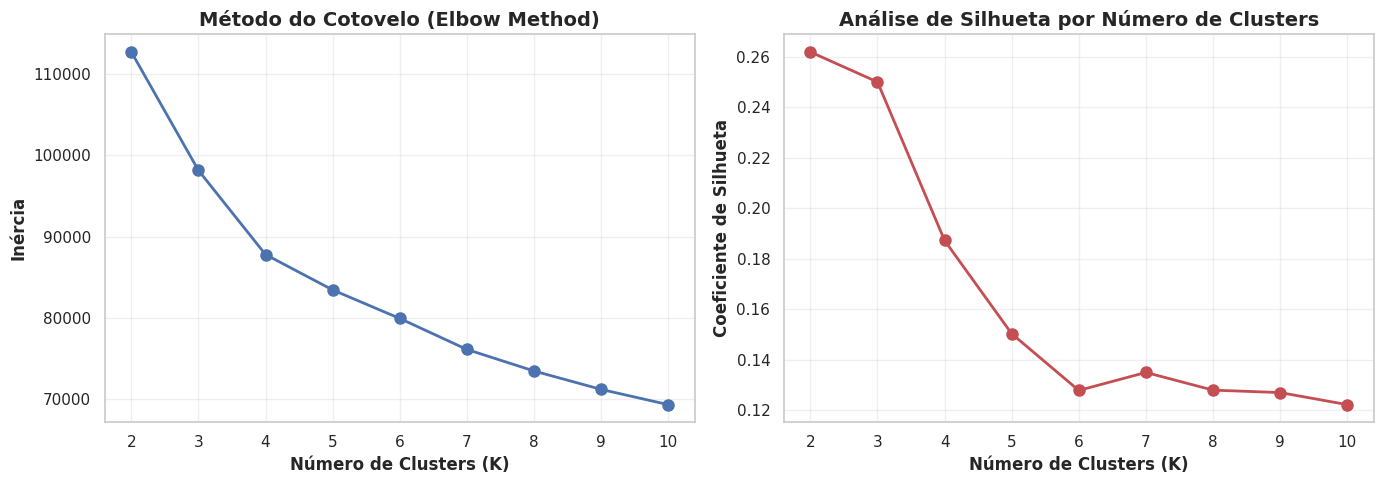


K ótimo (máxima silhueta): 2


In [ ]:
# ============================================================================
# DETERMINAÇÃO DO NÚMERO ÓTIMO DE CLUSTERS (MÉTODO ELBOW)
# ============================================================================
print("\n\n DETERMINAÇÃO DO NÚMERO ÓTIMO DE CLUSTERS")
print("-" * 80)

inertia = []
silhouette_scores = []
k_range = range(2, 11)

print("Testando diferentes valores de K...")
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertia.append(kmeans_temp.inertia_)
    sil_score = silhouette_score(X_scaled, kmeans_temp.labels_)
    silhouette_scores.append(sil_score)
    print(f"  K={k}: Inércia={kmeans_temp.inertia_:.2f}, Silhueta={sil_score:.4f}")

# Visualizar método do cotovelo
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('Inércia', fontsize=12, fontweight='bold')
plt.title('Método do Cotovelo (Elbow Method)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('Coeficiente de Silhueta', fontsize=12, fontweight='bold')
plt.title('Análise de Silhueta por Número de Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Encontrar K ótimo
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nK ótimo (máxima silhueta): {optimal_k}")

In [ ]:
# ============================================================================
# APLICAÇÃO DO ALGORITMO K-MEANS
# ============================================================================
print("\n\n APLICAÇÃO DO ALGORITMO K-MEANS")
print("-" * 80)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

print(f"K-Means aplicado com {optimal_k} clusters")
print(f"Centros dos clusters (primeiras 5 features):")
print(kmeans.cluster_centers_[:, :5])




 APLICAÇÃO DO ALGORITMO K-MEANS
--------------------------------------------------------------------------------
K-Means aplicado com 2 clusters
Centros dos clusters (primeiras 5 features):
[[ 0.65524562 -0.00395155  0.96547442  0.93943088  0.7735037 ]
 [-0.40817096  0.00246153 -0.60142122 -0.58519797 -0.48183725]]




 MÉTRICAS DE VALIDAÇÃO DO MODELO
--------------------------------------------------------------------------------
Coeficiente de Silhueta: 0.2620
  → Varia de -1 a 1. Valores > 0.5 indicam boa separação.
  → Resultado: ✗ Separação fraca

Índice de Davies-Bouldin: 1.5432
  → Quanto menor, melhor. Valores < 1 indicam boa separação.
  → Resultado: ✗ Separação fraca

Índice de Calinski-Harabasz: 5293.77
  → Quanto maior, melhor.

Inércia Total: 112759.17


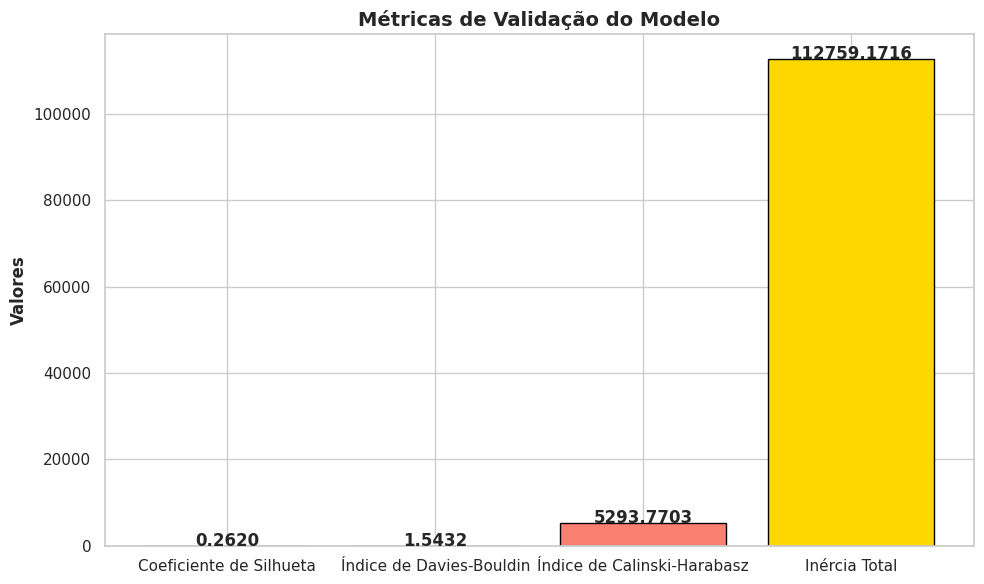

In [ ]:
# ============================================================================
# MÉTRICAS DE VALIDAÇÃO DO MODELO
# ============================================================================
print("\n\n MÉTRICAS DE VALIDAÇÃO DO MODELO")
print("-" * 80)

# Calcular as métricas
silhouette = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
inertia_final = kmeans.inertia_

# Exibir métricas
print(f"Coeficiente de Silhueta: {silhouette:.4f}")
print(f"  → Varia de -1 a 1. Valores > 0.5 indicam boa separação.")
print(f"  → Resultado: {'✓ Boa separação' if silhouette > 0.5 else '⚠ Separação moderada' if silhouette > 0.3 else '✗ Separação fraca'}")

print(f"\nÍndice de Davies-Bouldin: {davies_bouldin:.4f}")
print(f"  → Quanto menor, melhor. Valores < 1 indicam boa separação.")
print(f"  → Resultado: {'✓ Boa separação' if davies_bouldin < 1 else '⚠ Separação moderada' if davies_bouldin < 1.5 else '✗ Separação fraca'}")

print(f"\nÍndice de Calinski-Harabasz: {calinski_harabasz:.2f}")
print(f"  → Quanto maior, melhor.")

print(f"\nInércia Total: {inertia_final:.2f}")

# Criar gráfico de barras para as métricas
metrics = {
    'Coeficiente de Silhueta': silhouette,
    'Índice de Davies-Bouldin': davies_bouldin,
    'Índice de Calinski-Harabasz': calinski_harabasz,
    'Inércia Total': inertia_final
}

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(metrics.keys(), metrics.values(), color=['lightblue', 'lightgreen', 'salmon', 'gold'], edgecolor='black')

# Configurar rótulos e título
ax.set_ylabel('Valores', fontsize=12, fontweight='bold')
ax.set_title('Métricas de Validação do Modelo', fontsize=14, fontweight='bold')
ax.axhline(0, color='black',linewidth=0.8, ls='--')

# Adicionar anotações para cada barra
for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



 Média das Variáveis por Cluster
--------------------------------------------------------------------------------


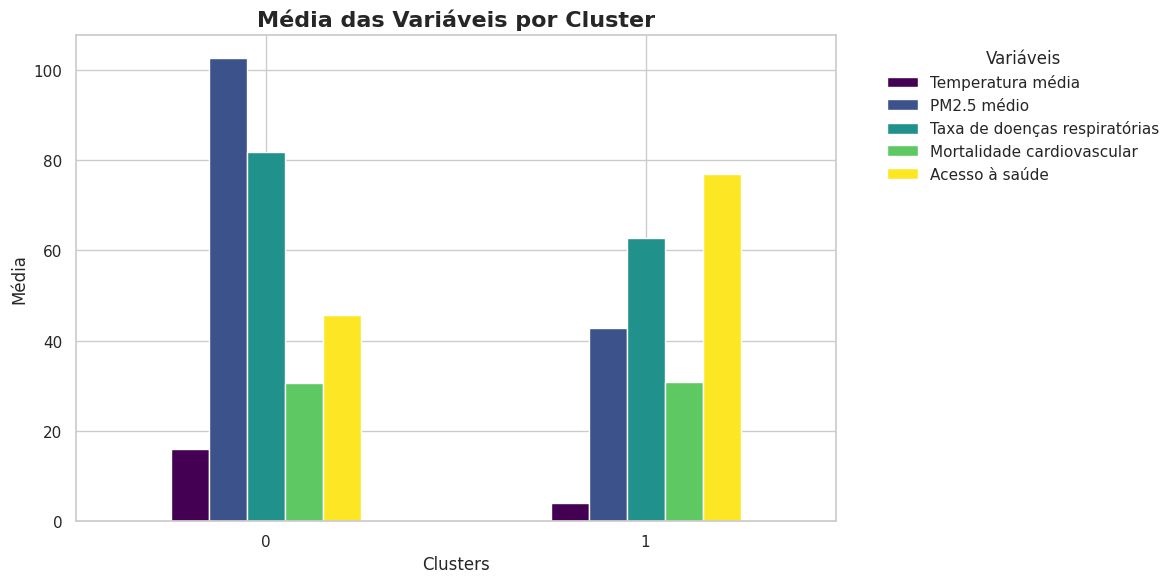

In [ ]:
# ============================================================================
# MÉDIA DAS VARIÁVEIS POR CLUSTER
# ============================================================================
print("\n\n Média das Variáveis por Cluster")
print("-" * 80)


df['cluster'] = clusters

clusters_summary = {}

for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    clusters_summary[cluster_id] = {
        'Temperatura média': cluster_data['temperature_celsius'].mean(),
        'PM2.5 médio': cluster_data['pm25_ugm3'].mean(),
        'Taxa de doenças respiratórias': cluster_data['respiratory_disease_rate'].mean(),
        'Mortalidade cardiovascular': cluster_data['cardio_mortality_rate'].mean(),
        'Acesso à saúde': cluster_data['healthcare_access_index'].mean()
    }

# Convertendo para DataFrame para facilitar a plotagem
summary_df = pd.DataFrame(clusters_summary).T

# Plotando o gráfico de barras
summary_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Configurando rótulos e título
plt.title('Média das Variáveis por Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Média', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Variáveis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 VISUALIZAÇÃO DOS CLUSTERS (PCA)
--------------------------------------------------------------------------------
Variância explicada pelos 2 primeiros componentes: 55.92%


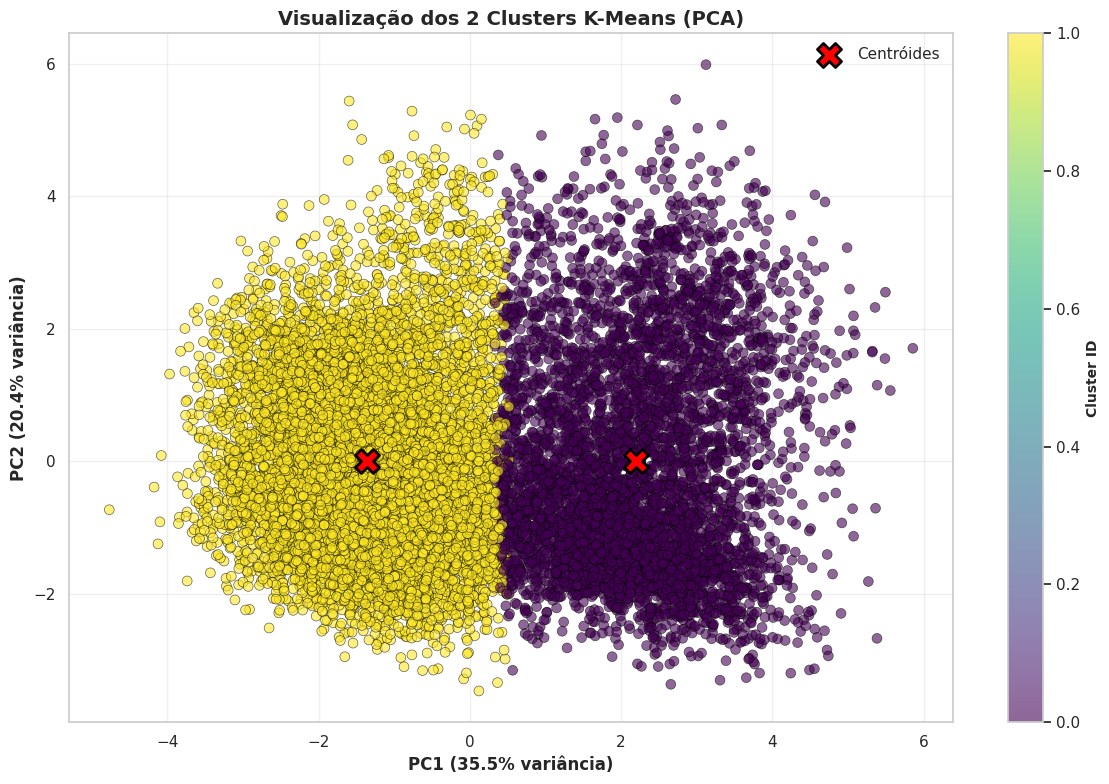

In [ ]:
# ============================================================================
# VISUALIZAÇÃO DOS CLUSTERS (PCA)
# ============================================================================
print("\n VISUALIZAÇÃO DOS CLUSTERS (PCA)")
print("-" * 80)

# Importar PCA
from sklearn.decomposition import PCA

# Aplicando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Variância explicada pelos 2 primeiros componentes: {pca.explained_variance_ratio_.sum():.2%}")

# Criando o gráfico
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis',
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)

# Adicionando os centróides
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', marker='X', s=300, edgecolors='black', linewidth=2, label='Centróides')

# Configurando os rótulos e título
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variância)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variância)', fontsize=12, fontweight='bold')
plt.title(f'Visualização dos {optimal_k} Clusters K-Means (PCA)', fontsize=14, fontweight='bold')

# Adicionando a barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster ID', fontsize=10, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



 CARACTERÍSTICAS POR CLUSTER
--------------------------------------------------------------------------------


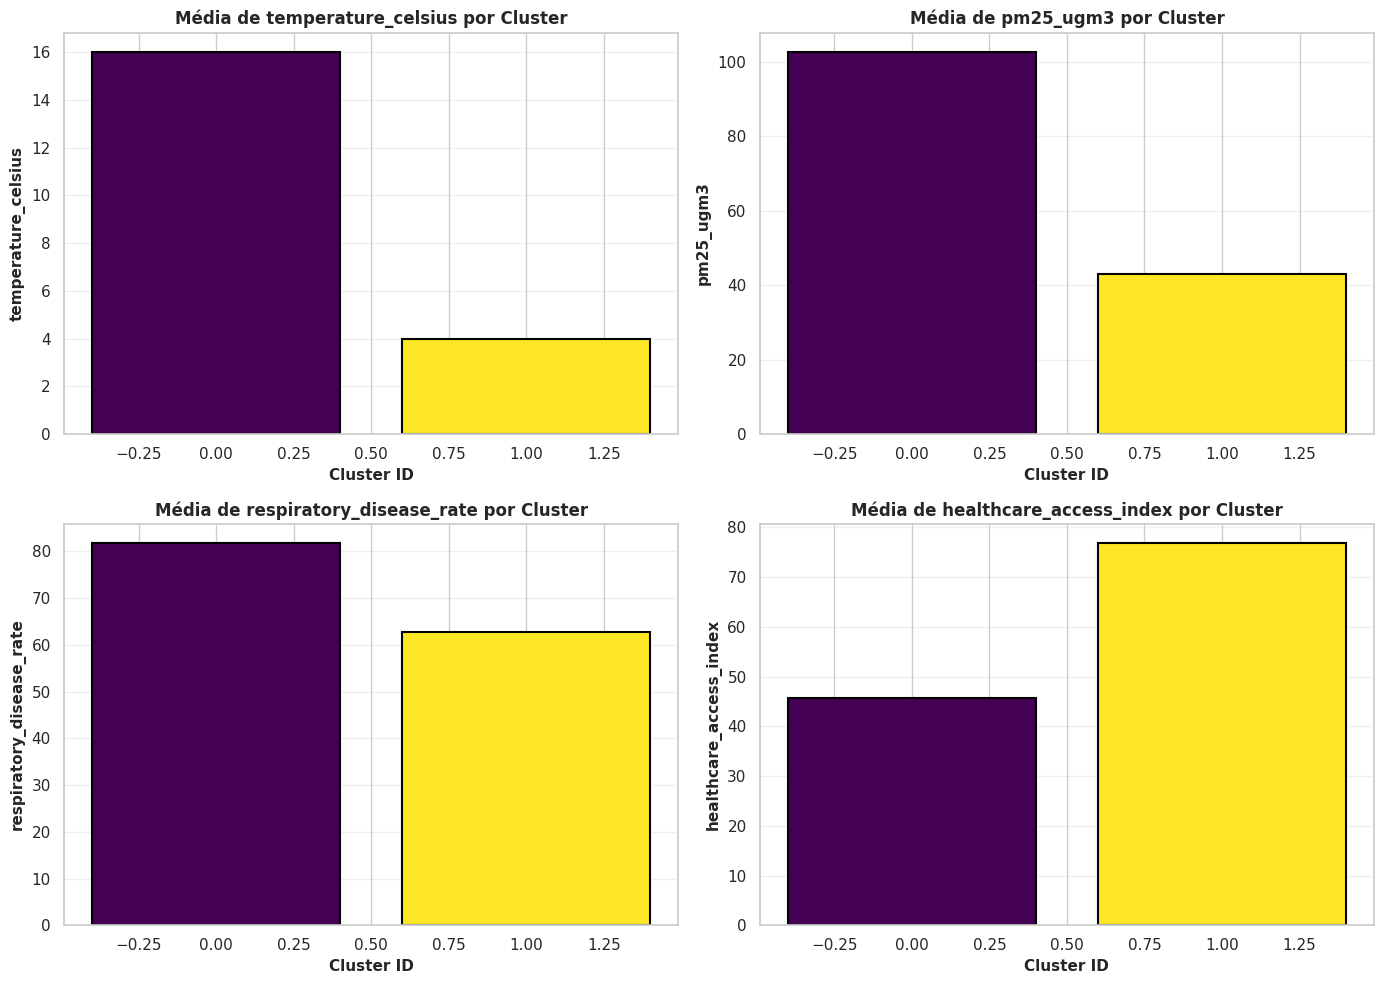

In [ ]:
# ============================================================================
#  CARACTERÍSTICAS POR CLUSTER
# ============================================================================
print("\n\n CARACTERÍSTICAS POR CLUSTER")
print("-" * 80)

main_features = ['temperature_celsius', 'pm25_ugm3', 'respiratory_disease_rate',
                 'healthcare_access_index']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(main_features):
    cluster_means = df.groupby('cluster')[feature].mean()
    colors_clusters = plt.cm.viridis(np.linspace(0, 1, optimal_k))
    axes[idx].bar(cluster_means.index, cluster_means.values, color=colors_clusters,
                  edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel('Cluster ID', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Média de {feature} por Cluster', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



--------------------------------------------------------------------------------
VISUALIZAÇÃO DA MATRIZ DE CORRELAÇÃO
--------------------------------------------------------------------------------


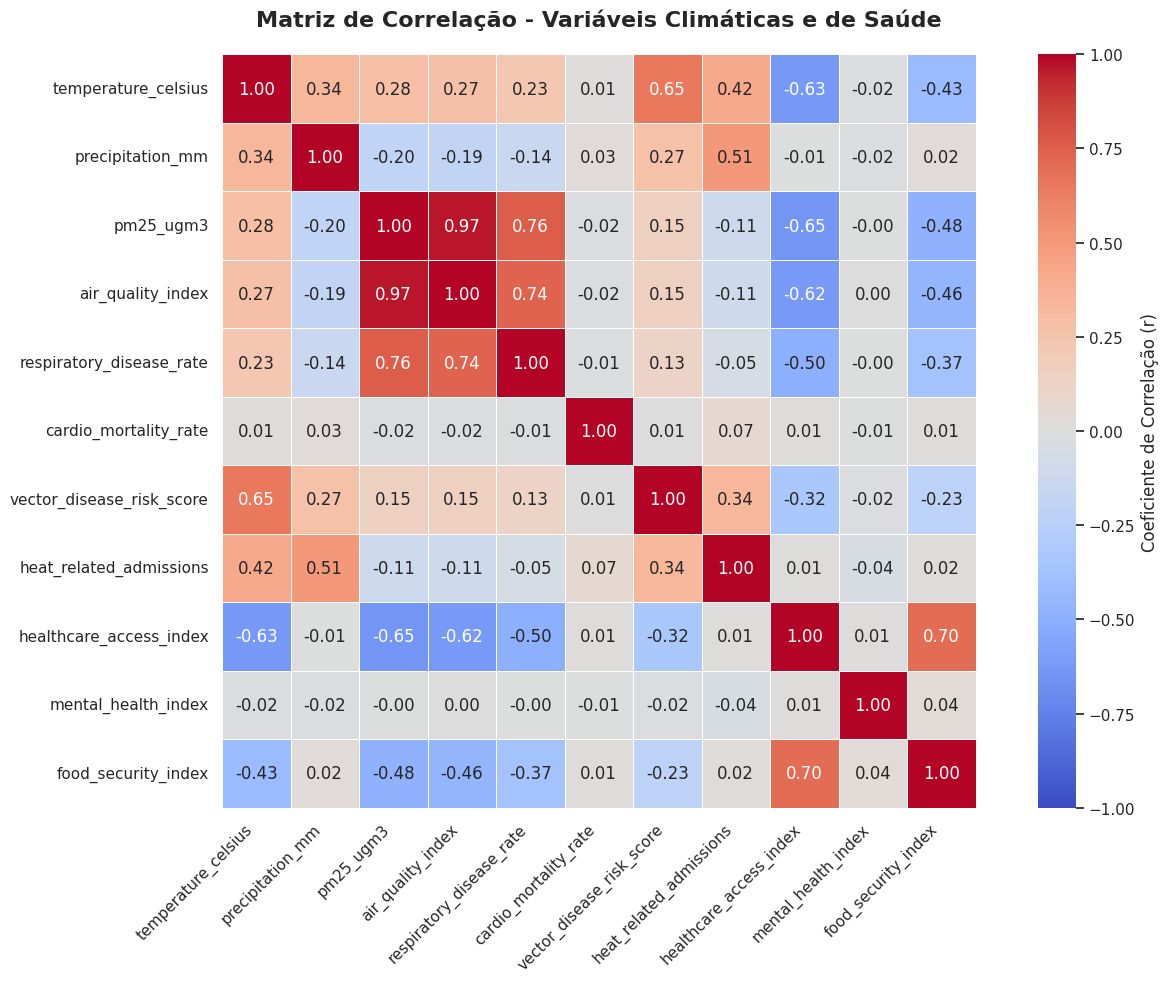

In [ ]:
# ============================================================================
# VISUALIZAR MATRIZ DE CORRELAÇÃO
# ============================================================================
print("\n" + "-"*80)
print("VISUALIZAÇÃO DA MATRIZ DE CORRELAÇÃO")
print("-"*80)

# Criar figura com tamanho apropriado
plt.figure(figsize=(14, 10))

# Criar heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Coeficiente de Correlação (r)'},
            vmin=-1, vmax=1)

plt.title('Matriz de Correlação - Variáveis Climáticas e de Saúde',
          fontsize=16, fontweight='bold', pad=20)

# Rotacionar labels para melhor legibilidade
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
# plt.savefig('matriz_correlacao_heatmap.png', dpi=300, bbox_inches='tight')
# print("\n✓ Heatmap salvo como: matriz_correlacao_heatmap.png")
plt.show()




  GRÁFICO RADAR DOS CENTRÓIDESR
--------------------------------------------------------------------------------


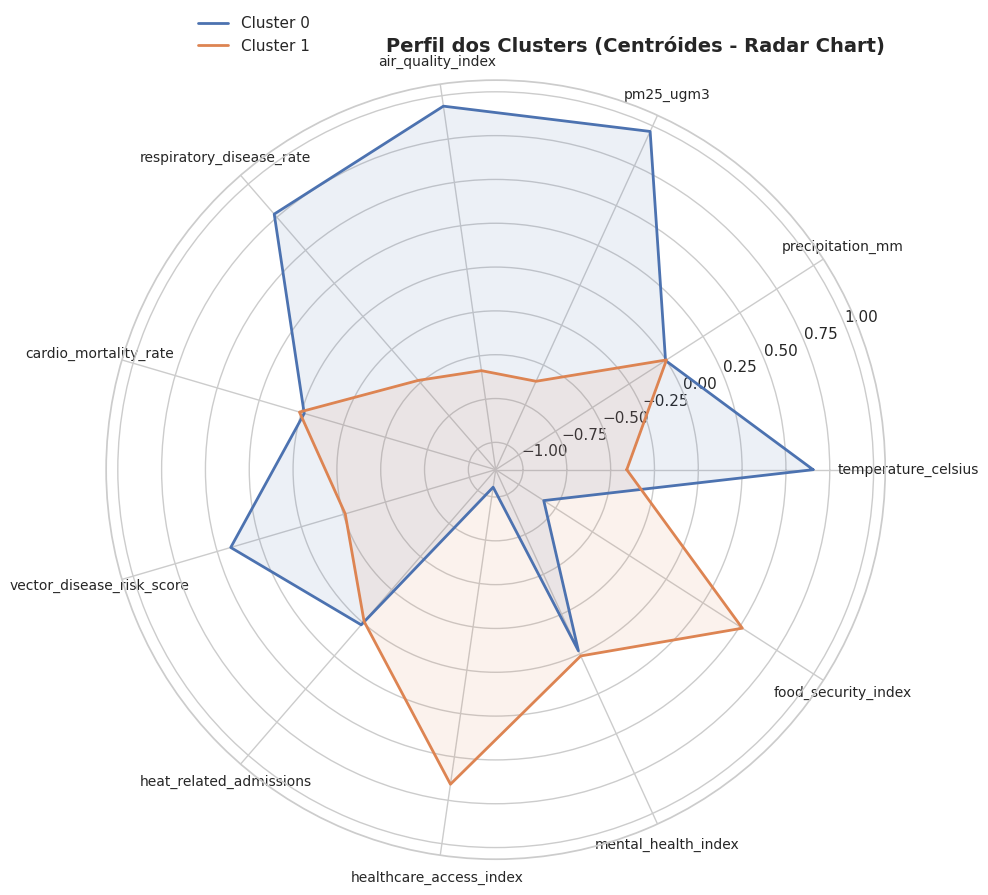

In [ ]:
# ============================================================================
# GRÁFICO RADAR DOS CENTRÓIDES
# ============================================================================
print("\n\n  GRÁFICO RADAR DOS CENTRÓIDESR")
print("-" * 80)

centers = kmeans.cluster_centers_
labels = X.columns
num_vars = len(labels)

# Calcular ângulos para cada eixo
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Criar a figura e o eixo polar
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plotar cada centróide
for i, centro in enumerate(centers):
    valores = np.concatenate((centro, [centro[0]]))
    angulos = angles + [angles[0]]

    ax.plot(angulos, valores, linewidth=2, label=f'Cluster {i}')
    ax.fill(angulos, valores, alpha=0.1)

# Configurações do gráfico
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=10)
ax.set_title("Perfil dos Clusters (Centróides - Radar Chart)", fontsize=14, fontweight='bold', pad=20, loc='right')
ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))
plt.tight_layout()
plt.show()
